___
# <font color=#EEAA11> HW #5: Visualization </font>



____

## <font color=#00BBFF> Problem #1 (10 pts) </font>

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries.

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets, and not penguins)

____

**If** you want some helper code, look the code below. **If** you use it, comment every line and ensure that it is PEP-8 compliant, and _adapt it to your choice of dataset_. (This is a good time to play with datasets you might use in your project - use the opportunity!)

Text(0.5, 1.0, 'with zscore')

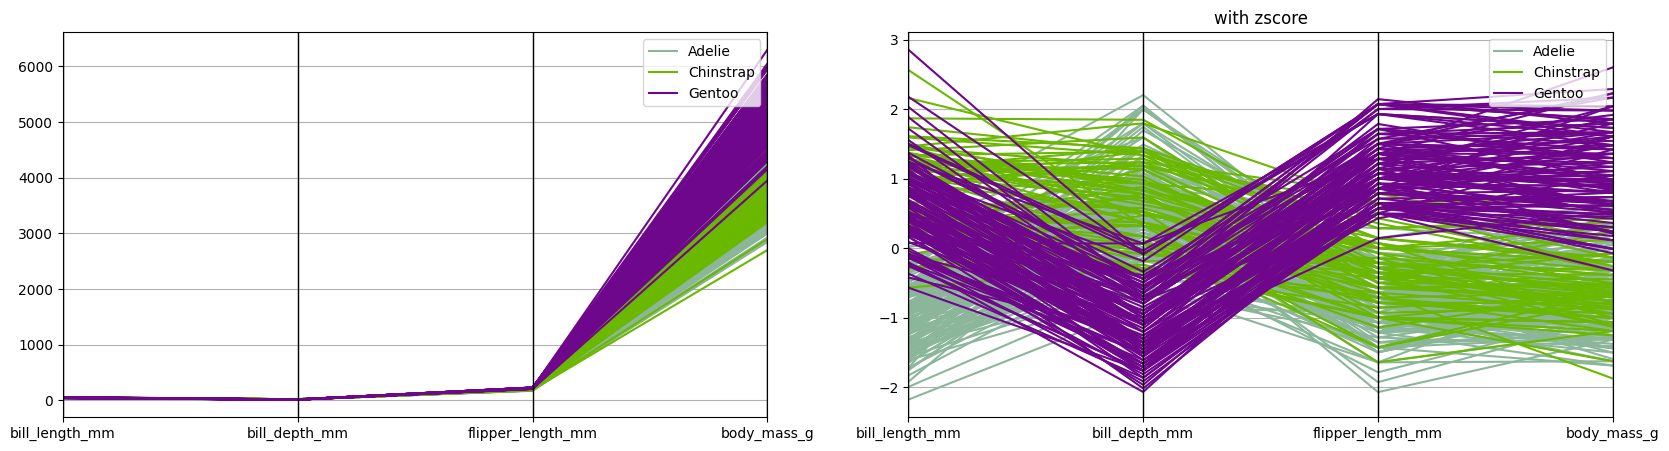

In [2]:
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# choose the penguin dataset
df_p = sns.load_dataset("penguins").dropna()

pd.plotting.parallel_coordinates(df_p[["species", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "species", ax=a1)

# another option
#pd.plotting.parallel_coordinates(df_p[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a1)

numeric_cols = df_p.select_dtypes(include=[np.number]).columns

df_p_s = df_p[numeric_cols].apply(zscore)

df_p_s["species"] = df_p["species"]
pd.plotting.parallel_coordinates(df_p_s, "species", ax=a2)
plt.title("with zscore")

#df_p_s["sex"] = df_p["sex"]
#pd.plotting.parallel_coordinates(df_p_s[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a2)


Text(0.5, 1.0, 'with zscore')

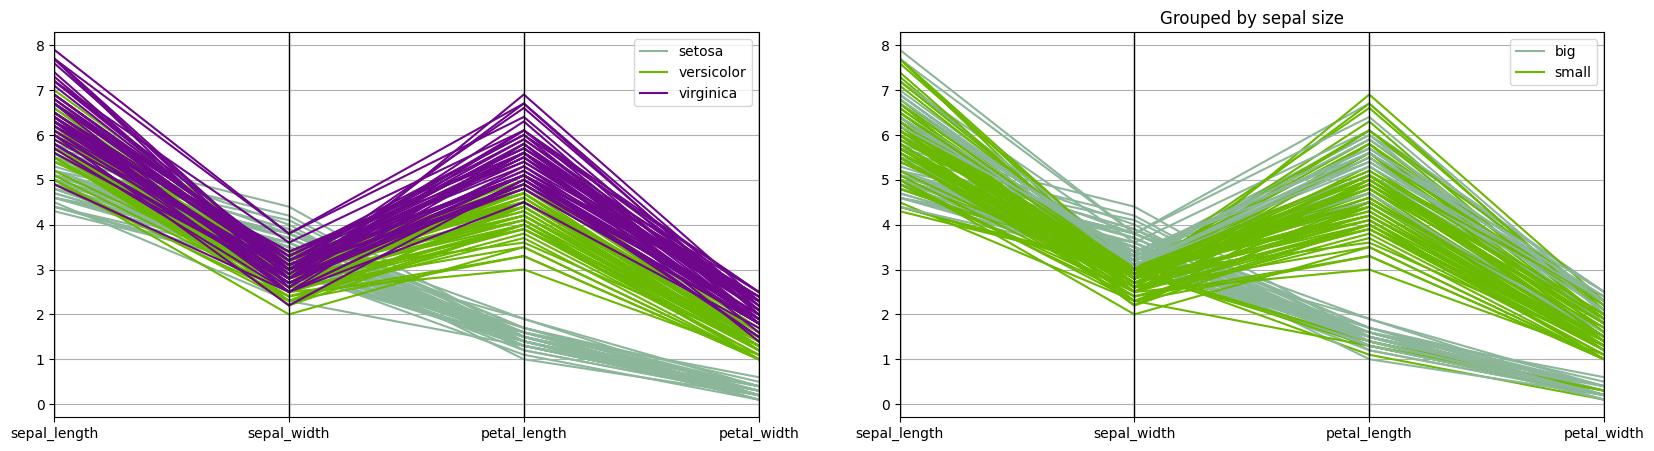

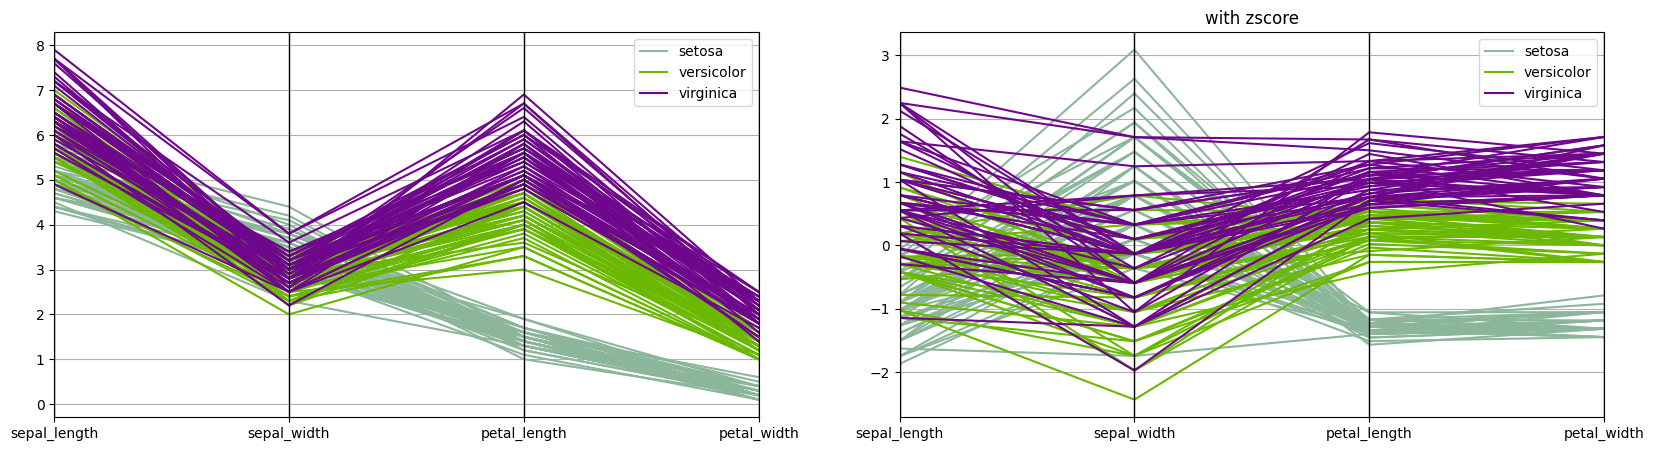

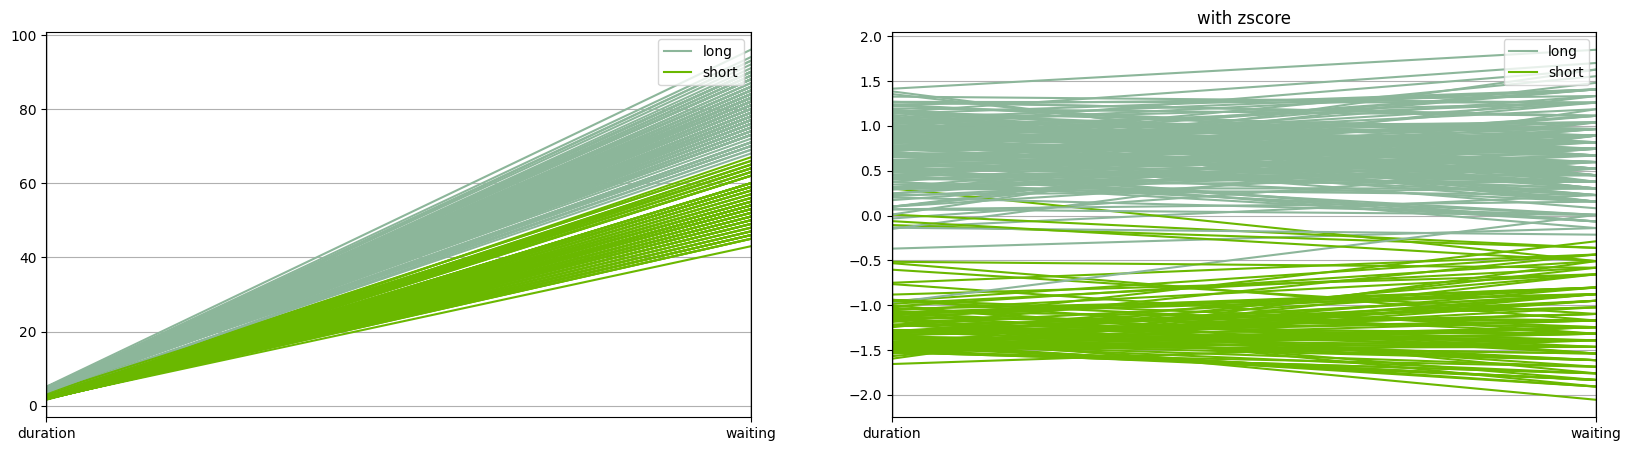

In [3]:
# I will do my own explorations using the iris and geysers datasets
f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# iris data set
df_i = sns.load_dataset('iris').dropna()
# geyser data set
df_g = sns.load_dataset('geyser').dropna()

# make a paraelle plot of iris 
# note we don't need to subset because we will use all the cols
pd.plotting.parallel_coordinates(df_i, 'species', ax=a1)
# make new categorical variable based on sepal width > 3
df_i['big_sepal'] = np.where(df_i['sepal_width'] > 3, 'big', 'small')
pd.plotting.parallel_coordinates(df_i[['sepal_length', 'sepal_width','petal_length', 'petal_width', 'big_sepal']], 'big_sepal', ax=a2)
plt.title('Grouped by sepal size')

# z-scale data and remake parallel plot
# re-initialize figure
f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))
pd.plotting.parallel_coordinates(df_i[['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species']], 'species', ax=a1)
numeric_cols = df_i.select_dtypes(include=[np.number]).columns

df_i_s = df_i[numeric_cols].apply(zscore)

df_i_s["species"] = df_i["species"]
pd.plotting.parallel_coordinates(df_i_s, "species", ax=a2)
plt.title("with zscore")


# make a graph of z-scale differences but with geyser data
f, (a1, a2) = plt.subplots(ncols = 2, nrows = 1, figsize = (20,5))
pd.plotting.parallel_coordinates(df_g, 'kind', ax = a1)
numeric_cols = df_g.select_dtypes(include=np.number).columns
df_g_s = df_g[numeric_cols].apply(zscore)
df_g_s['kind'] = df_g['kind']
pd.plotting.parallel_coordinates(df_g_s, 'kind', ax = a2)
plt.title('with zscore')

### Does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets
- **I think that scaling does aid in the visualization process. In the penguin datset bodymass is on a different scale than the other measurements so it kind of dominates the graph when the data is NOT scaled. I chose to look at the iris and geyser datasets. In both datasets all of the quantitative measurements are on the same scale either centimeters for Iris or minutes for geyser so the differences between scaled and not scaled are more subtle than might otherwise be observed. However, even though they are on the same unit scale, the measurements can vary quite a bit. In the geyser dataset all the values for 'duration' are relatively small compared to the values for 'waiting' so in the unscaled graph it is hard to observed the differences between the long and short group. On the other hand, in the scaled version of geyser, both features now have a mean of 0 so it's easy to see how the 'long' and 'short' groups are different from each other.** 

____

## <font color=#00BBFF>  Problem #2 (10) </font>

Next, we are going to compare the previous result with HiPlot, which is a library specifically designed for exploring high-dimensional datasets. It tends to look better, have more features and _-- most importantly for EDA --_ it is interactive.

🤓 Follow these steps:
* install [HiPlot](https://github.com/facebookresearch/hiplot) on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with a dataset you explored in the previous problem,
  - **I opened the unscaled geyser dataset**
* play with HiPlot so that you know how to use its most important features:
* how do you select a portion of one of the vertical axes?
  - **To select a portion of one verticilar axis click the axis and drag over the desired area.**
* how do you slide the range box vertically to select different portions of the data?
  - **After selecting a portion you can click on the edge of the box and drag to make it small or large.**
* can you select (with the gray boxes) different ranges on different vertical axes?
  - **Yes, you can select ranges from multiple axes.**
* how do you reorder the vertical axes?
  - **To reorder the axes click and drag the whole axis to the left or right.**
* what use the dataframe below the plot? what happens if you mouse over the rows?
  - **The dataframe under the plot is for further analysis. If you hover the mouse over a row then it will highlight that sample in the parallel plot.** 
* for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.
  - **I reordered the geyser dataset so it starts as "kind", then 'waiting', and 'duration'. When organized this way it becomes more clear to see how the "kind" of geyser determines how long the the audience tends to wait for. 'Long' geysers typically have a longer wait time than 'short'**

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html)

In [29]:
import hiplot as hip

print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [34]:
hip.Experiment.from_dataframe(df_g).display()

<IPython.core.display.Javascript object>

____

## <font color=#00BBFF>  Problem #3 (15) </font>

It is time to start working on your project!

Read the instructions on projects given in D2L and Teams so that you are very familiar with the plan. As always, please contact us on Teams with any questions that arise!

In a cell below, write your current ideas for your project. I would like this to come from you on a topic what is of interest to you. Answer these questions:
* what topics are you interested in?
 - **I would like to use data from my plant breeding PhD thesis in the class project.**
* do you already have a dataset you want to work with?
 - **Yes, I have collected photosynthetic parameters from a panel of corn plants in multiple years with replicates. The total size of the dataset is approximately:**
    - 244 Maize Genotypes x 
    - 2 Nitrogen Treatments x 
    - 2 Years x 
    - 2 Replicates = 1952 samples**
 - **I have performed some very basic analysis but have not really explored the dataset**
* if not, explore datasets online to see if you can find several that might work
    - as we have seen, there are datasets in some of the standard Python libraries (e.g., Seaborn, sklearn, Pandas), but there are also repos like [this one](https://archive.ics.uci.edu)
* identify a definite dataset you want to work with for the next few weeks - you will be able to change it; in fact, you might find it can't do what you hope and you will have to change it
* discuss the dataset(s) you found and what you think they can do for you: it is important that there is a narrative, a purpose, a story
 - **The dataset I collected over 2 years with the various categorical factors (genotype, Nitrogen treatment, year). It contains measurements of different physiological parameters related to photosynthesis such as the rate of CO2 and H2O flux across the leaf. These parameters reveal how quickly plants are assimilating carbon from the atmosphere and sequentially fixing it in the edible grain. The data is important because it might enable the breeding of more effecient corn genotypes in terms of Nitrogen fertilizer usage. It is from PhD work so I would say that I am intamitely familiar with the data. I believe this is an excellent opportunity for me to work on a chapter of my research and also meet the needs of the class.**
* from what you know today, what visualizations and interactive elements might you use in your app?
 - **It would be a really interesting to make a parallel graph of the various photosynthetic parameters. A parallel plot could be of particular usefullness in plant breeding because a breeder is often interested in the behaviour of a specific genotype that exhibits beneficial traits.**

Give as many details as you can. And, if you have any concerns, discuss those as well. We need to think about risk mitigation because in data science we don't always have the data we wish we did. 



____

## <font color=#00BBFF>  Problem #4 (15) </font>

Read Chapter 3 in your textbook. In a markdown cell, summarize your favorite story told in the chapter and discuss why it clearly illustrates the notion of causality to you. 

Next, go to [this webpage](https://www.tylervigen.com/spurious-correlations). Find the page **Discover a correlation** and scroll down to find a topic of interest to you; for example, **Google searches**. Click on one and then find something below it to correlate it with. Create the funniest pairing you can and write a short paragraph to make it seem real. There will be a channel on Teams where you can post your result, if you wish. Put the paragraph first, and then the plot that "proves" your hypothesis. 

Here is an example:

### Favorite story from chapter 3 and how it illustrates notion of casuality
  - **My favorite story from chapter 3 is about what was the cause of World War I. The cause of World War I is often attributed to the assassination of Arch Duke Franz ferdinand but there was so many factors  that focusing on just one individual factor does not paint thte whole picture. By starting to think about all the counterfactual worlds where a suspected cause happened and did not happen helps to understand what causes are more important.**

#### Genetically Modified Soybeans Help Provide Energy

By editing the GeoTherm gene in soybeans scientists created a mutant plant capable of tapping into geothermal deposits with its roots. Because the plants absorb heat energy from the ground they are capable of thriving in extrememly cold environments. Currently only Russia is crazy enough to grow the beans which are produced in North Dakota. The two places came to a business deal after bonding over their shared interest about providing heat during long and cold winters. 

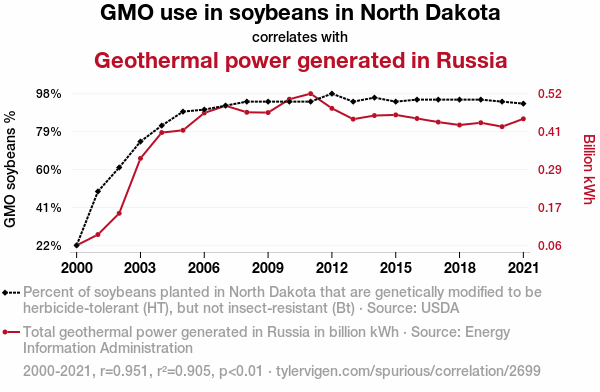

Our very reputable reporter Dalle-3 generated this photo of the scene.

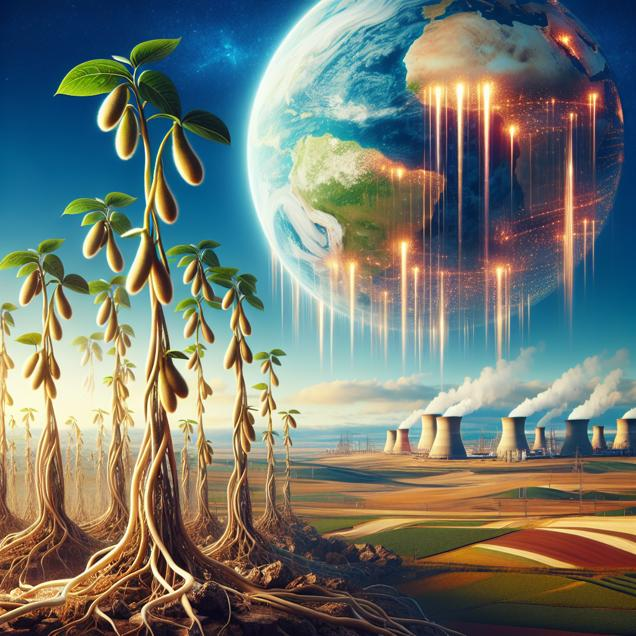




#### Pychological Effects of Margarine

Margarine consumption causes couples to move further apart. We suspect that the slick, oily texture of margarine has a psychological effect, subtly eroding the bonds of marriage over time because meals have drifted away from slow and healthy meals to quick meals alone.

Some psychologists even theorize that margarine, being a processed substitute for butter, symbolizes a deeper discontent in the lives of those who consume it—perhaps a reflection of emotional substitutes in relationships. The message is clear: _If you love your spouse, stay away from margarine!_

With this discovery, today we are launching a public health campaign: "**Save Your Marriage, Skip the Margarine**." Margarine joins the ranks of other known relationship stressors like long commutes, financial woes, and reality TV shows.

You’ve heard the facts:  here's the data: 



![marg](https://tylervigen.com/spurious/correlation/image/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine.svg)